# Project 1 - Generalized Linear Models with Gradient Descent

## Yan Bo Zeng

In [3]:
library(sandwich)
library(AER)
library(dplyr)
options(scipen = 999)

Recall the ordinary least squares model $y_i = x_i'\beta + \epsilon_i$, the maximum likelihood estimator (MLE) for the coefficient parameter $\beta$ is
$$\hat{\beta} = \arg\max_{\beta \in \mathbb{R}^k} -\frac{1}{2n} \sum_{i=1}^{n} \left(y_i - x_i'\beta \right)^2 \\ = \arg\min_{\beta \in \mathbb{R}^k} \frac{1}{2n} \sum_{i=1}^{n} \left(y_i - x_i'\beta \right)^2$$

Denote $\frac{1}{2n} \sum_{i=1}^{n} \left(y_i - x_i'\beta \right)^2 = Q(\beta)$, $X$ as the model matrix including the intercept term, and $Y$ as the outcome vector. Then, the gradient
$$\nabla Q(\beta) = \frac{\partial}{\partial\beta} Q(\beta) \\ = \frac{1}{n} \sum_{i=1}^{n} \left(y_i - x_i'\beta \right)x_i \\ = \frac{1}{n} X'\left(Y - X\beta \right)$$

Thus, given learning rate $\alpha_t$, gradient descent will iterate on
$$\hat{\beta}_{t+1} = \hat{\beta}_{t} + \alpha_t \nabla Q(\hat{\beta}_{t}) = \hat{\beta}_{t} + \alpha_t \frac{1}{n} X'\left(Y - X\hat{\beta}_{t} \right)$$

In [10]:
OLS_gradient_descent <- function(X, y, beta_init = rep(0, dim(X)[2]), alpha = 0.01, num_iters = 10^5, history_var = "log(price)") {
    
    #Record beta for one of the coefficients from each iteration.
    beta_history <- rep(0, num_iters)
    
    #Initialize beta.
    beta <- beta_init
    
    #Implement gradient descent for OLS regression.
    for (i in 1:num_iters) {
        delta <- t(X) %*% (y - X %*% beta) / length(y)
        beta <- beta + alpha * delta
        beta_history[i] <- beta[history_var, 1]
    }
    
    #Return the history for plotting.
    return(list(beta, beta_history))
}

## Test the algorithm on orange juice advertisement data.
Firstly, we use the R built-in glm() package to obtain the coefficient estimates.

In [12]:
oj <- read.csv("C:/Users/yanbo/OneDrive/Stanford MS&E 311 Optimization/oj.csv")
X <- model.matrix(log(sales) ~ log(price) + brand, data = oj)
y <- log(oj$sales)

builtin <- glm(formula = log(sales) ~ log(price) + brand, data = oj)
summary(builtin)


Call:
glm(formula = log(sales) ~ log(price) + brand, data = oj)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.3152  -0.5246  -0.0502   0.4929   3.5088  

Coefficients:
                 Estimate Std. Error t value            Pr(>|t|)    
(Intercept)      10.82882    0.01453  745.04 <0.0000000000000002 ***
log(price)       -3.13869    0.02293 -136.89 <0.0000000000000002 ***
brandminute.maid  0.87017    0.01293   67.32 <0.0000000000000002 ***
brandtropicana    1.52994    0.01631   93.81 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.6296804)

    Null deviance: 30079  on 28946  degrees of freedom
Residual deviance: 18225  on 28943  degrees of freedom
AIC: 68765

Number of Fisher Scoring iterations: 2


### Learning rate = 0.01.

(Intercept),10.8288216
log(price),-3.1386914
brandminute.maid,0.8701747
brandtropicana,1.5299428


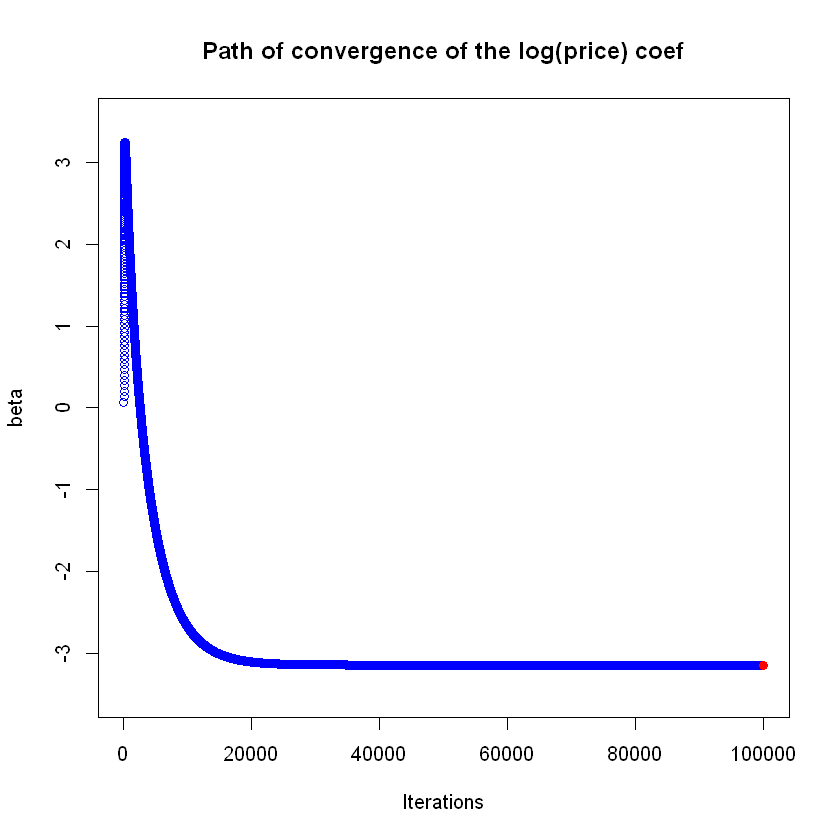

In [8]:
betalist <- OLS_gradient_descent(X, y)
betalist[[1]]

#Visualize the path of convergence.
plot(betalist[[2]], col = 'blue', main = 'Path of convergence of the log(price) coef', ylab = 'beta', xlab = 'Iterations', ylim = c(-3.5, 3.5))
points(x = length(betalist[[2]]), y = coef(builtin)['log(price)'], pch = 16, col = 'red')

### Learning rate = 0.1.

(Intercept),10.8288216
log(price),-3.1386914
brandminute.maid,0.8701747
brandtropicana,1.5299428


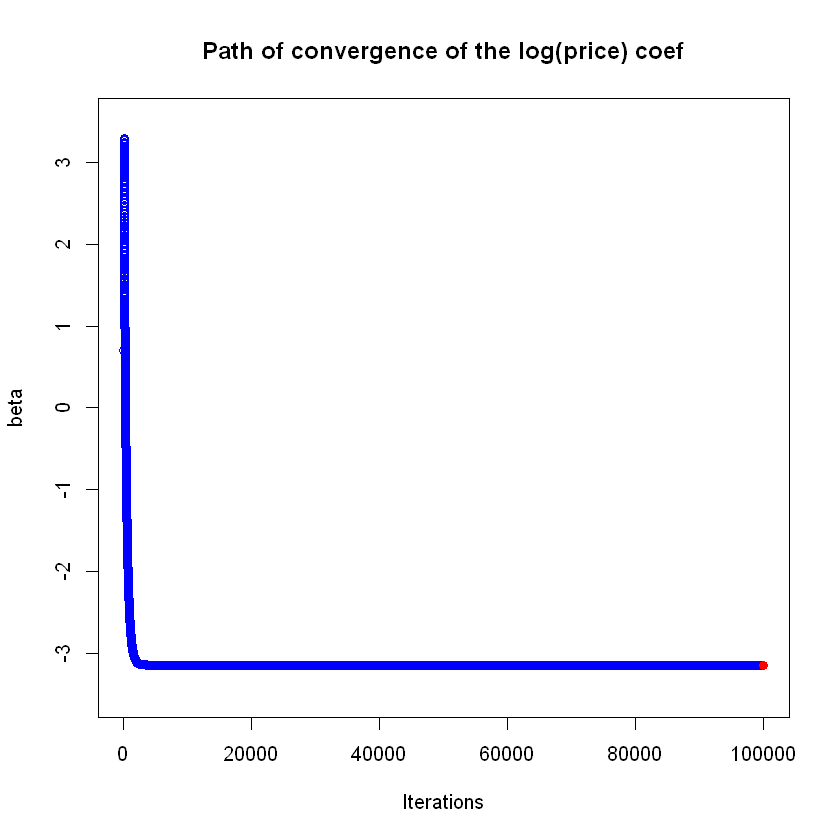

In [9]:
betalist <- OLS_gradient_descent(X, y, alpha = 0.1)
betalist[[1]]

#Visualize the path of convergence.
plot(betalist[[2]], col = 'blue', main = 'Path of convergence of the log(price) coef', ylab = 'beta', xlab = 'Iterations', ylim = c(-3.5, 3.5))
points(x = length(betalist[[2]]), y = coef(builtin)['log(price)'], pch = 16, col = 'red')